![cropped-SummerWorkshop_Header.png](../../resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Allen Brain Observatory Visual Behavior Ophys </h1> 
<h2 align="center"> SWDB 2024 - Day 1 </h2> 
<h3 align="center"> Afternoon Session </h3> 

The Allen Brain Observatory Visual Coding Two-Photon dataset is a large-scale survey of physiological activity in mouse visual cortex in response to a variety of visual stimuli under passive viewing conditions.  The animals are head-fixed but free to run on a disc.  Single plane two-photon calcium imaging is performed in different areas and layers with transgenically targeted cell lines.  This notebook is a brief introduction to get you started with this data set and lead you to resources for you to explore further.

## Visual Behavior Ophys Dataset

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Experimental design </h3>

<p>This notebook will teach you how to access data from the Allen Brain Observatory Visual Behavior Ophys dataset. 

The key components of this dataset are: 
* Mice performing a visual change detection task
* Measurements of licking and rewards during task performance 
* Running speed and pupil diameter as measures of arousal
* Optical physiology recordings (2-photon calcium imaging) 
* Targeting genetically defined cell types (excitatory, Sst inhibitory, and Vip inhibitory neurons)
* Simultaneous recordings across multiple visual areas across cortical depths
* Tracking the same cells across days with different sensory and behavioral contexts

</div>

![optical_physiology.png](../../resources/optical_physiology.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Key questions </h3>

<p>This dataset was designed to answer questions like: 

* 

</div>

- How are stimuli and features from the external world encoded in neural responses?  
- How do the encoding properties differ across areas and layers?  In different cell lines?
- Can you build predictive models of response from stimuli?
- How are running activity and pupil size related to cortical activity?
- How can information about the stimuli and/or the animal's state be extracted from neural activity?  Can you decode stimuli?
- Do neurons coordinate their activity?  Do the act in ensembles?  
- Is there any spatial aspect to neural information?

These are just some of the questions that might be addressed from this type of data.  

**Databook**

We will describe some of the key conditions from this dataset below, but there are many more important details to be found in the databook: https://allenswdb.github.io/physiology/ophys/visual-coding/vc2p-background.html

![Image](resources/databook_vc2p.png)

Using the Python objects we'll show you below, you can extract information about this dataset such as how many recordings from a given area or Cre line.

For each targeted area, layer, and Cre line, each mouse is recorded for three sessions (see more on this below).  There is a datafile for each session that includes (not exhaustive):

- Various flourescence traces from different stages of the processing pipeline.
- Running activity of the mouse
- Pupil size and eye tracking (for some sessions)
- Stimulus presentation timing and templates
- Max projection images and roi masks for each cell
- Extracted event traces from a deconvolution algorithm (in a separate file)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Outline </h3>

<p>

1. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<p>
Genetically encoded calcium indicators like GCaMP6 are what make calcium imaging possible. GCaMP is a protein that fluoresces when bound to calcium. 
Using genetic engineering, it is possible to create transgenic mice that express this calcium indicator in any genetically defined cell population of interest. 

In the Visual Behavior Ophys dataset, 3 types of transgenic mice were used to express GCaMP in either <b>excitatory neurons</b> (labeled by the Slc17a7-IRES2-Cre driver line), 
or in one of two types of <b>inhibitory neurons</b> - somatostatin (Sst) expressing neurons or vasoactive intestinal peptide (Vip) expressing neurons. 

These two inhibitory populations are known to mutually inhibit each other and a shift in the balance between them can lead to disinhibition of excitatory neurons under certain conditions.

You can read more about transgenic mice in the *DataBook*
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4> Change detection task </h4>

<p>In this dataset, neural activity was recorded while mice performed a behaviorally guided task, specifically a visual change detection task. 

During the change detection task, mice view a continuous stream of natural scene images, which are displayed for 250ms, followed by a 500ms gray screen period. The gray screen period adds a working memory component to the task. The job of the mouse is to decide - "is what i am seeing now the same or different than what i saw 500ms ago?". 

If the mouse correctly responds by licking a reward spout within 750ms of an image change, the trial is considered a hit, and they get a water reward. If they fail to lick after a change, the trial is a miss. If the mouse licks anytime outside of the reward window, the trial resets and the mouse will have to wait longer until the next opportunity for a reward comes. 

</div>

![change_detection_task.png](../../resources/change_detection_task.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
While there is technically a trial structure imposed by the experimenter, such that an image change will occur following an exponential distribution between 4 and 12 flashes following the last lick, this is invisible to the mouse. The stimuli appear in a continuous stream with no breaks, and no trial start cue. One interesting question is whether mice form an internal model of the change time distribution and try to predict when the changes are most likely to happen. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h5> Session structure </h5>
<p>
In addition to 60 minutes of change detection task performance, each ophys session has a few additional stimulus blocks that are useful for various purposes. 

Right before and right after the change detection task, there is a 5 minute period with a simple gray screen stimulus. 
This allows measurement of spontaneous activity levels in the absence of specific sensory stimuli.

At the very end of the session, a 30 second movie clip is shown 10 times. 
This can be helpful to drive activity in many neurons and aids in cell segmentation. 
It also allows activity patterns for the same stimulus to be compared across many days.

When looking at cell activity in the tutorial below, pay attention to the first 5 minutes and last 10 minutes of the session - does the activity look different during those time periods?


![vbo_session_structure.png](../../resources/vbo_session_structure.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h5> Ophys sessions vs. behavior training sessions </h5>
<p>

Each `ophys_session` has a corresponding `behavior_session`, however not all `behavior_sessions` have Ophys.

The dataset also includes all of the `behavior_sessions` the mice experienced while they learned the change detection task, before the ophys portion of the experiment. These training sessions do not have 2-photon calcium imaging recordings. Neural activity was only measured once the mice were well trained. 

Mice learn the task through a series of automated training stages to help shape their behavior. There are many interesting questions about how mice learn the task that can be asked with this dataset, but we will not be focusing on those today.

Also note that behavior training sessions do not have the 5 minute spontaneous activity periods or repeated movie clip that was described above. Those stimulus blocks are only shown during ophys sessions.
</div>

![automated_training.png](../../resources/automated_training.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4> Cohorts and session types</h4>
<p>

However, not all mice underwent the exact same training and imaging procedures. There are actually 4 unique cohorts of mice in the Visual Behavior Ophys dataset. 
These cohorts are distinguished by their `project_code`. The key differences between mice in these different cohorts (i.e. 'project codes') are: 
<p>

* Whether single-plane or multi-plane 2-photon imaging was performed
* Which areas and depths were imaged 
* Which image set was shown during training versus during ophys
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<p>
These 4 cohorts of mice allow us to ask different questions, with slightly different variations on the experimental design. 
For example, for mice belonging to the <b>VisualBehavior</b> and <b>VisualBehaviorTask1B</b> cohorts, everything about the experiment was the same, except for which image set was used during training. 
This allows us to ask whether any differences in activity observed during the novel sessions are truly due to novelty, and not the unique features of the image set. 

The <b>VisualBehaviorMultiscope</b> cohort uses the same training procedure as <b>VisualBehavior</b>, but these mice were imaged using multi-plane 2-photon calcium imaging, meaning that up to 8 unique imaging planes could be recorded in each session.
The recordings for these mice were made in the primary (VISp) and secondary (VISl) visual areas, across 4 depths per area. 

The <b>VisualBehaviorMultiscope4areasx2d</b> cohort has a special twist - during ophys sessions when novel images are shown, there are also 2 familiar images interleaved. 
This allows comparison of familiar and novel image responses, and behavioral differences, within the same session. In contrast, in all other cohorts, familiar and novel stimuli are always in separate sessions. 
The Visual Behavior Neuropixels dataset shares this same design, using the same image sets for training and in vivo recordings.  
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

During the 2-photon imaging phase of the experiment, a given population of neurons (i.e. a specific imaging plane) was measured across multiple sessions. 
This allows analysis of changes in neural activity across days, under different sensory and behavioral contexts. 
For example, in some ophys sessions, mice perform the task with the image set they saw during training, which is highly familiar. 
In other sessions, mice perform the task with images they have never seen before. 

This means we need to keep track of a few things when doing analysis: 
<p>

* Which type of session we are looking at (was it during training or during ophys? what image set was used?)
* Which imaging plane (i.e. population of neurons) we are looking at (what brain area is it in? what is the depth in the cortex?)
* Which type of cells are being imaged (what is the genotype of the mouse?)                                                                      

This information is provided as metadata by the <b>AllenSDK</b> toolkit, which you will learn how to use below                                                                                                                                         

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

In the nomenclature of the <b>AllenSDK</b> we refer to each imaging plane within each session as an `ophys_experiment`.

The population of neurons in each imaging plane was tracked across multiple `ophys_sessions`, recorded on different days.

The collection of recording sessions belonging to a given imaging plane is called an `ophys_container`.
</div>

![data_structure.png](../../resources/data_structure.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Multi-plane imaging across sensory & behavioral contexts</h4>

<p>
In in <b>Visual Behavior Ophys</b> dataset, a given population of neurons (i.e. a specific imaging plane) was measured across multiple sessions, and multiple imaging planes were recorded in each individual session. 

This experimental design allows analysis of changes in neural activity across days, under different <b>sensory and behavioral contexts</b>, and comparison of activity across different visual areas or cortical depths within a given session.

In some ophys sessions, mice perform the task with the image set they saw during training, which is highly <b>familiar</b>. 
In other sessions, mice perform the task with <b>novel</b> images they have never seen before. 

In addition to <b>active behavior</b> sessions where mice perform the task to earn rewards, there are also <b>passive viewing</b> sessions where the mice observe the stimulus in open loop, with no rewards delivered. In these passive sessions, mice are satiated and were given their daily water ration prior to the imaging session. 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

These different features of the experiment means we need to keep track of a few things when doing analysis: 
<p>

* Which <b>session type</b> we are looking at (what image set was used? was it an active or passive session?)
  
* Which <b>brain area and cortical depth</b> the cells are from (i.e. which imaging plane it is within a session?)
  
* Which <b>genetically defined cell population</b> was imaged (i.e. what is the genotype of the mouse?)                                                                      

This information is provided as metadata by the <b>AllenSDK</b> toolkit, which you will learn how to use below.                                                                                                                                        

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

In the nomenclature of the <b>AllenSDK</b> we refer to each imaging plane within each session as an `ophys_experiment`.

The population of neurons in each imaging plane was tracked across multiple `ophys_sessions`, recorded on different days.

The collection of recording sessions belonging to a given imaging plane is called an `ophys_container`.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Accessing data with the AllenSDK</h3>
<p>

To identify experiments of interest based on the features of this dataset as described above, such as what cell populations were imaged, what types of sessions there were, etc., we need to access the metadata tables in the `VisualBehaviorOphysProjectCache` using the `AllenSDK` toolkit.

The `VisualBehaviorOphysProjectCache` class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded into data assets on CodeOcean - These data are big, and this will save us a lot of bandwidth and time.

</div>


In [1]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4>Using the AllenSDK toolkit</h4>

<p>
To identify experiments of interest based on the features of this dataset as described above, such as what cell populations were imaged, what types of sessions there were, etc., we need to access the metadata tables in the `VisualBehaviorOphysProjectCache` using the `AllenSDK` toolkit.

The `VisualBehaviorOphysProjectCache` class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded into data assets on CodeOcean - These data are big, and this will save us a lot of bandwidth and time.

</div>


In [2]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

The code below shows you how to use the `VisualBehaviorOphysProjectCache` class to load metadata tables & explore the features of the dataset.

In [3]:
# This is the directory where files will be saved
# If using Code Ocean, this should link to the data directory, where the files will already be available
# output_dir = r'/scratch/'
output_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'

In [4]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[sti

The cache contains methods that allow you to explore the types of recording sessions that exist in the dataset, and to load the data for individual experiments.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Metadata tables </h3>


#### Load all cache tables

In [5]:
# There are 4 metadata tables associated with the Visual Behavior Ophys dataset
behavior_session_table = cache.get_behavior_session_table()  
ophys_session_table = cache.get_ophys_session_table()   
ophys_experiment_table = cache.get_ophys_experiment_table()    
ophys_cells_table = cache.get_ophys_cells_table()                         


#print number of items in each table 
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(ophys_session_table)))
print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))
print('Number of unique cells = {}'.format(len(ophys_cells_table.cell_specimen_id.unique())))

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936
Number of unique cells = 50476


What is the difference between the `ophys_session_table` and the `ophys_experiment_table`? 

In [6]:
ophys_experiment_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [7]:
ophys_session_table.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
951410079,951520319,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,...,active_behavior,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,4,"[951980471, 951980473, 951980475, 951980479, 9...",2
952430817,952554548,"[1018028339, 1018028345, 1018028354, 1018028357]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,209,...,passive_viewing,Familiar,0,66,1,2019-09-23 08:45:38.490000+00:00,MESO.1,4,"[953659743, 953659745, 953659749, 953659752]",2
954954402,953982960,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,210,...,active_behavior,Familiar,0,67,2,2019-09-24 09:01:31.582000+00:00,MESO.1,4,"[958527464, 958527471, 958527474, 958527479, 9...",2
955775716,956010809,"[1018028339, 1018028342, 1018028345]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,212,...,active_behavior,Familiar,1,68,3,2019-09-26 09:22:21.772000+00:00,MESO.1,4,"[956941841, 956941844, 956941846]",2
957020350,957032492,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,213,...,active_behavior,Novel 1,0,0,4,2019-09-27 08:58:37.005000+00:00,MESO.1,4,"[957759562, 957759564, 957759566, 957759570, 9...",2


The `ophys_experiment_table` contains one row for each imaging plane recorded in each session for all mice in the dataset. 

The `ophys_session_table` contains one row for each ophys session, which can contain one or more imaging planes. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<p>
The metadata tables include a number of key details for understanding the dataset, such as - where the recordings were made, what type of cells were labeled, and what stimulus was shown in a given session. 

The *DataBook* describes all the columns of the metadata tables. We will explore a few of the most important ones here. 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

First, let's narrow down our search and specifically look at the sessions for the <b>VisualBehaviorMultiscope</b> cohort. 

Filter the `ophys_session_table` to limit to the <b>VisualBehaviorMultiscope</b> `project_code` and assign the results to a new variable called `multiscope_sessions`.

How many mice are in this cohort? What mouse genotypes are available? (Hint: get the unique values of the `full_genotype` column)

In [8]:
# Limit to a specific cohort / project code and check how many mice there are
project_code = 'VisualBehaviorMultiscope'
multiscope_sessions = ophys_session_table[ophys_session_table.project_code==project_code]
print('There are', len(multiscope_sessions.mouse_id.unique()), 'mice in the', project_code, 'project_code')

There are 24 mice in the VisualBehaviorMultiscope project_code


In [9]:
# Check what genotypes are available for this cohort
print('Available genotypes:')
print(multiscope_sessions.full_genotype.unique())

Available genotypes:
['Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'
 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4>What is a genotype?</h4>
    
Typically, several transgenic lines of mice are bred together to create cell type specific expression of a gene of interest by combining a `driver line` (also called a `cre_line`) expressing Cre recombinase under the control of a specific gene of interest, and a `reporter line` that expresses some protein (such as GCaMP) under the control of Cre recombinase. This allows scientists to mix and match a variety of drivers & reporters to do different types of experiments. 

The `full_genotype`: describes the strategy that was used to label a given cell population with GCaMP.

The `cre_line`: is the first element of the `full_genotype` and determines which cell population is being targeted. In this dataset, it can be Slc17a7 for excitatory neurons, or Sst or Vip for different types of inhibitory neurons.

The `reporter_line`: is the final element of the `full_genotype` and determines what kind of reporter gene is expressed. In this dataset GCaMP6f is used.

You can learn more about transgenic mice and associated techniques in the <b>*DataBook*</b>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's look at an experiment where Sst inhibitory neurons were recorded. 

What are the unique values of the `mouse_id` column for mice with `cre_line` = <b>Sst-IRES-Cre</b> in the `multiscope_sessions` table we just made?

Pick the mouse with the largest value of `mouse_id` and assign it to a new variable called `special_mouse_id`.

What are the available values of the `session_type` column for this mouse?

Note the data type of the `mouse_id` column.

In [10]:
# Filter by cre_line to get just the Sst mice, then print out the unique values of mouse_id, sorted in ascending order
cre_line = 'Sst-IRES-Cre'
sst_mice = multiscope_sessions[(multiscope_sessions.cre_line==cre_line)].mouse_id.unique()
print(np.sort(sst_mice))

['440631' '448366' '457841' '482853' '544965' '546605']


In [11]:
# This is our special mouse
special_mouse_id = '546605'

In [12]:
# Get all session types for special mouse
ophys_session_table[ophys_session_table.mouse_id==special_mouse_id].session_type.unique()

array(['OPHYS_1_images_A', 'OPHYS_2_images_A_passive', 'OPHYS_4_images_B',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_B'], dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4>What session type to choose?</h4>

The `session_type` column is a short hand description that conveys a several pieces of information about what the mouse experienced during a given session. Some of these pieces of information also have their own unique columns that you can search by. The `session_type` includes: 
<p>

* Whether the session was during <b>TRAINING</b> or <b>OPHYS</b> (the first element of the `session_type`)
* Which `image_set` was shown during that session (the second element of the `session_type`)
* The `behavior_type`, whether the session was <b>active behavior</b> or <b>passive viewing</b> (if the session type doesnt say `passive` at the end, that means it was an active behavior session)

<p>
Other columns that provide valuable information about what happened during a session include: 
<p>

`experience_level`: whether the session used <b>Familiar</b> or <b>Novel</b> images, and whether it was the first novel day (`Novel 1`) or a subsequent novel day `Novel >1`

`prior_exposures_to_image_set`: how many prior sessions the mouse has experienced with the image set being shown during the current session (should always be zero for `Novel 1` sessions)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `ophys_session_id` for `session_type` = `OPHYS_1_images_A` for our special mouse. Save it to a variable called `familiar_session_id`.

What are the values of `experience_level` and `prior_exposures_to_image_set` for this session?

In [13]:
# Get the session metadata for special mouse with the session type listed above
sessions = ophys_session_table[(ophys_session_table.mouse_id==special_mouse_id) & 
                                (ophys_session_table.session_type=='OPHYS_1_images_A')]
sessions.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
1080522184,1080558783,"[1079027842, 1079027847, 1079027857, 1079027861]",546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,181,...,active_behavior,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,4,"[1080945462, 1080945465, 1080945468, 1080945471]",2


In [14]:
familiar_session_id = sessions.index.values[0]

In [15]:
# What is the experience_level and prior exposures value for this session?
sessions[['session_type', 'experience_level', 'prior_exposures_to_image_set']]

,session_type,experience_level,prior_exposures_to_image_set
ophys_session_id,,,
1080522184,OPHYS_1_images_A,Familiar,41


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4>Where was imaging performed for this session?</h4>

Relevant metadata columns include: 

`imaging_depth`: Because Ca2+ imaging is an optical technique, recordings must be targeted to a specific focal depth of the microscope, corresponding to how deep in the tissue the images were collected. 
The values in the `imaging_depth` column indicate the distance from the cortical surface for each imaging plane that was recorded. 

`targeted_structure`: This is the brain area where the recording was made. 
In Allen Brain Observatory Ophys experiments, specific visual areas are targeted using Intrinsic Signal Imaging (ISI) to identify the boundaries of each visual area based on their reinotopic maps. You can learn more about this method in the <b>DataBook</b>.

As we saw previously, the `ophys_experiment_table` contains metadata for each individual image plane that was recorded in each session. Accordingly, information about which areas and depths were recorded can be found in the `ophys_experiment_table`, but not in the `ophys_session_table`. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `ophys_experiment_table` to find all the imaging planes recorded in the `familiar_session_id` from our special mouse.

What `targeted_structures` were imaged? What are the available values of `imaging_depth`? What `equipment_name` was used to record this session?

In [16]:
# Get all recordings for session type OPHYS_1_images_A for our special mouse using the ophys_session_id we saved above
experiments = ophys_experiment_table[ophys_experiment_table.ophys_session_id==familiar_session_id]
experiments.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1080945462,1080558783,1080522184,1079027842,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,505
1080945465,1080558783,1080522184,1079027847,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,506
1080945468,1080558783,1080522184,1079027857,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,507
1080945471,1080558783,1080522184,1079027861,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,508


In [17]:
# Print out the targeted structures and the imaging depths
print(experiments.targeted_structure.unique())
print(experiments.imaging_depth.unique())

['VISp' 'VISl']
[225 300 213]


In [18]:
# We can also look at both of these pieces of information at once by limiting the table just to those columns (plus a few others that might be interesting)
experiments[['targeted_structure', 'imaging_depth', 'session_type', 'experience_level', 'equipment_name']]

,targeted_structure,imaging_depth,session_type,experience_level,equipment_name
ophys_experiment_id,,,,,
1080945462,VISp,225,OPHYS_1_images_A,Familiar,MESO.1
1080945465,VISp,300,OPHYS_1_images_A,Familiar,MESO.1
1080945468,VISl,213,OPHYS_1_images_A,Familiar,MESO.1
1080945471,VISl,300,OPHYS_1_images_A,Familiar,MESO.1


In this session, recordings were made in VISp and VISl, at multiple cortical depths. However we only see 4 imaging planes here (each represented by a unique `ophys_experiment_id`) - shouldnt we expect 8 imaging planes per session for multi-plane imaging experiments? 

While it is true that 8 imaging planes are recorded in each multi-plane imaging session (acquired using the `MESO.1` or `MESO.2` microscopes), there are strict quality control (QC) criteria applied to each imaging plane. 

Some of the 8 planes can fail QC while others pass. Examples of QC criteria include: how much brain motion there was for a given plane or whether the signal to noise was too low to detect cells.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `ophys_experiment_id` for the recording in `VISp` at `225`um depth, and save it to a variable called `ophys_experiment_id`

In [19]:
targeted_structure = 'VISp'
imaging_depth = 225
ophys_experiment_id = experiments[(experiments.targeted_structure==targeted_structure) & 
                                    (experiments.imaging_depth==imaging_depth)].index.values[0]
print(ophys_experiment_id)

1080945462


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Physiology data </h3>

To load the data for a single imaging plane recorded in a given session, we can use the `get_behavior_ophys_experiment` method of the `VisualBehaviorOphysProjectCache` class that we instantiated previously as `cache`. 

This method returns a python object that contains all data and metadata for a given recording as attributes, along with some useful functions. We typically name this python object simply `dataset`.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `ophys_experiment_id` we saved above as the input to the `get_behavior_ophys_experiment` method of the cache. 

Save the output to a variable called `dataset`. This is a python object that contains all the data for this imaging plane. 

Examine the `metadata` attribute.


In [20]:
# Load the dataset for the ophys_experiment_id we selected 
dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [21]:
# Look at the metadata attribute
dataset.metadata

{'equipment_name': 'MESO.1',
 'sex': 'M',
 'age_in_days': 181,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2021, 2, 2, 9, 56, 33, 243000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('75ef16e0-b427-4451-b872-cdcd74553968'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '546605',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 1080558783,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1079027842,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 225,
 'targeted_imaging_depth': 228,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 1080945462,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 1080522184,
 'targeted_structure': 'VISp'}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4>What physiology data is provided?</h4>
<p>

`dff_traces`: dataframe containing normalized fluorescence traces for each cell. dF/F or dFF stands for 'delta fluorescence over baseline fluorescence', i.e. the change in fluorescence relative to each cell's baseline signal. 

`events`: dataframe containing calcium events detected from fluorescence signals. events are detected based on the rapid rise in calcium, typically associated with bursts of spikes. Events have a time and a magnitude, roughly equivalent to the spike rate of a neuron.

`ophys_timestamps`: time, in seconds, of each imaging frame of the 2-photon movie. The indices of `dff_traces` and `events` correspond to the times in the `ophys_timestamps` array. Note that the frame rate of the recordings can vary, with 30Hz being typical for single-plane imaging sessions, and 11Hz typical for multi-plane imaging.

`max_projection`: array of maximum intensity projection image of the 2-photon movie. Allows visualization of pixels with large changes in fluorescence, corresponding to active neurons.  

`average_projection`: array of average intensity projection image of the 2-photon movie. Allows visualization of average fluorescence across the 2-photon field of view. 

`roi_masks`: dataframe containing regions of interest corresponding to neuron cell bodies, segmented from the 2-photon movies. Each cell trace comes from one of the roi_masks.

`segmentation_mask_image`: array containing all segmented ROIs.

`cell_specimen_table`: dataframe containing cell ROI information

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the `max_projection` and `segmentation_mask_image` this imaging plane. How many ROIs are there?

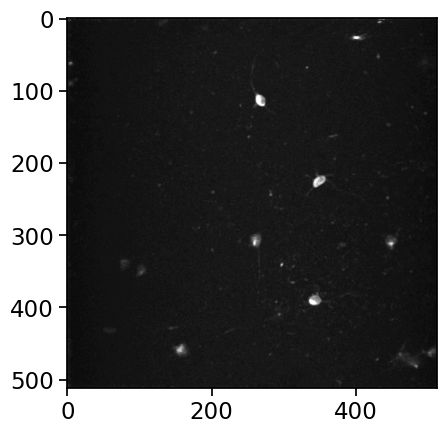

In [22]:
plt.imshow(dataset.max_projection, cmap='gray')

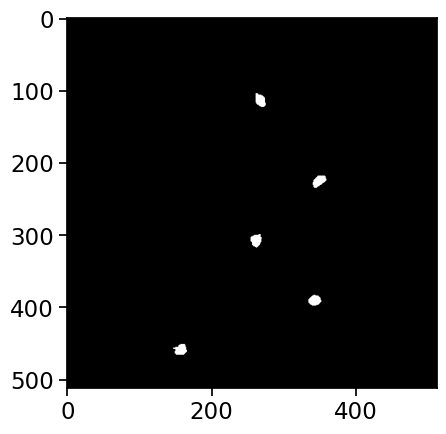

In [23]:
plt.imshow(dataset.segmentation_mask_image, cmap='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `dff_traces` and `events` attributes. How are they formatted?


In [24]:
dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1120091374,1115349817,"[0.7160711781887898, 0.6762362443504489, 0.388..."
1120091421,1115349824,"[1.8867693532204104, 1.060213996273943, 0.6995..."
1120091574,1115349846,"[1.2439478189398283, 1.1846218118269713, 0.312..."
1120091628,1115349850,"[0.4401555247935194, 0.7162578934052323, 0.430..."
1120091659,1115349854,"[0.3687507608006909, 0.38771313157157544, 0.41..."


In [25]:
dataset.events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1120091374,1115349817,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1492,0.121036
1120091421,1115349824,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.5322,0.228839
1120091574,1115349846,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3728,0.191850
1120091628,1115349850,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2187,0.146503
1120091659,1115349854,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2117,0.144065


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

The ```events``` table is similar to ```dff_traces``` but the output provides traces of deconvolved events. Events are computed on spatially unmixed dff traces for each cell as described in [Giovannucci et al. 2019](https://pubmed.ncbi.nlm.nih.gov/30652683/). 

The magnitude of events approximates the firing rate of neurons with the resolusion of about 200 ms. The biggest advantage of using events over dff traces is they exclude prolonged Ca transients that may conteminate neural responses to subsequent stimuli. You can also use ```filtered_events``` which are events convolved with a filter created using ```stats.halfnorm``` method. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Pick one `cell_specimen_id` and plot dF/F and events for that cell, using `ophys_timestamps` for the y-axis values to show the time in seconds. 


In [26]:
# Get cell_specimen_id from the cell_specimen_table. Can also get from either the dff_traces or events
cell_specimen_ids = dataset.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_id = cell_specimen_ids[1] # pick the second cell (index = 1 because python uses zero indexing)
print('Cell specimen id = {}'.format(cell_specimen_id)) # print the cell ID

Cell specimen id = 1120091421


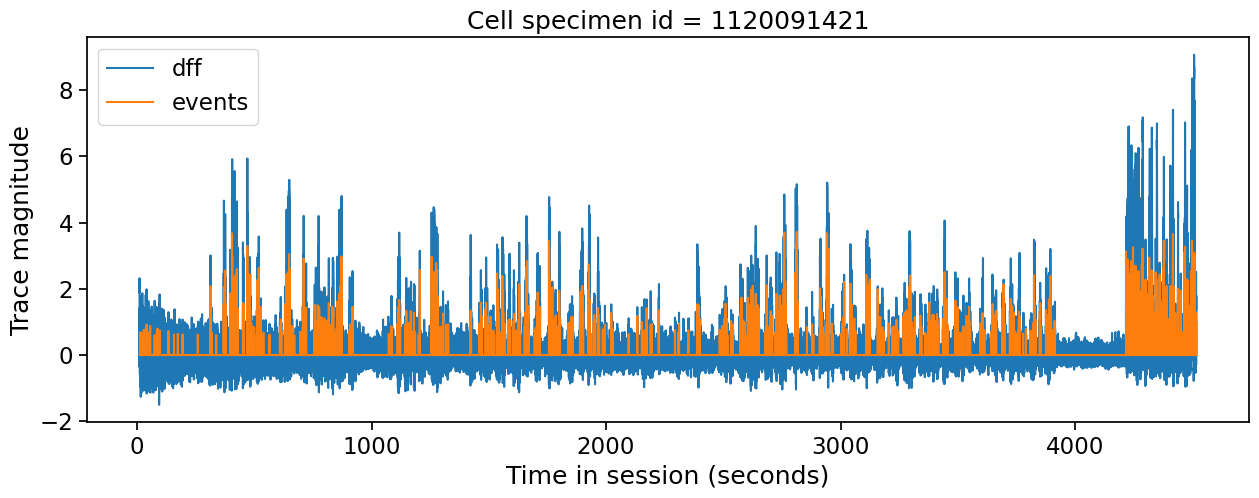

In [27]:
# Plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1, 1, figsize = (15,5))
ax.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id]['dff'], label='dff')
ax.plot(dataset.ophys_timestamps, dataset.events.loc[cell_specimen_id]['events'], label='events')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id))
ax.legend()


We can see that as expected, events trace is much cleaner than dff and it generally follows big calcium transients really well.

This cell is particularly active towards the end of the session - whats up with that? 

If you've checked out the <b>*DataBook*</b> description of the Visual Behavior Ophys dataset, you would have seen that each Visual Behavior Ophys experiment has 10 repeats of a 30 second movie clip at the end of each session. 
It would be interesting to see how reliable the cell's response is across repeats of the movie. 

You can also learn about what stimuli are presented and when using the `stimulus_presentations` table.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Stimulus presentations </h3>

Each ophys session is broken up into several <b>stimulus blocks</b>.

First, a 5 minute gray screen period occurs during which there are no visual stimuli. This is helpful to determine cells' baseline level of activity. There is another 5 minute gray screen period at the end of the session, followed by 10 repeats of a 30 second movie clip. 

The bulk of each ophys session is change detection task performance, which lasts for 60 minutes. During the change detection task, 8 different images are shown, with each image being repeatedly presented for 250ms, followed by a 500ms gray screen period. The task of the mouse is to ask - "is what i am seeing now the same or different than what i saw 500ms ago?". 

If the mouse licks the reward spout during the 750ms reward window following an image change, they will receive a water reward. If the mouse licks anytime outside the reward window, the onset of the next trial, and thus the next image change and opportunity for reward, will be delayed. 

While there is a trial structure to the task, it is invisible to the mouse. The stimuli appear as a continuous stream with no interruption or trial start cue. Image change times are drawn from an exponential distribution between 4 and 12 flashes from the time of the mouse's last lick. 


Insert image of stim blocks

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `stimulus_presentations` attribute. What are the columns? 

What are the values of the `stimulus_block_name` column?

In [28]:
# What does the stimulus_presentations table look like? 
dataset.stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,is_sham_change,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.366891,0.000000,309.366891,0,17985,False,<NA>,<NA>,-99,0,-99,spontaneous,False,False
1,1,change_detection_behavior,0,im065,-99,0.250210,309.366891,309.617101,17985,18000,False,False,False,-99,1,0,Natural_Images_Lum_Matched_set_training_2017,False,True
2,1,change_detection_behavior,0,im065,-99,0.250220,310.117501,310.367721,18030,18045,False,False,False,-99,2,0,Natural_Images_Lum_Matched_set_training_2017,False,True
3,1,change_detection_behavior,0,im065,-99,0.250190,310.868141,311.118331,18075,18090,False,False,False,-99,3,0,Natural_Images_Lum_Matched_set_training_2017,False,True
4,1,change_detection_behavior,0,im065,-99,0.250200,311.618751,311.868951,18120,18135,False,False,False,-99,4,0,Natural_Images_Lum_Matched_set_training_2017,False,True


In [29]:
# What are the stimulus blocks?
dataset.stimulus_presentations.stimulus_block_name.unique()

array(['initial_gray_screen_5min', 'change_detection_behavior',
       'post_behavior_gray_screen_5min', 'natural_movie_one'],
      dtype=object)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Assign the table to a variable called `stimulus_presentations`, so that we dont have to retrieve it from the dataset object every time we want to use it.

Select the `change_detection_behavior` block and look at the unique values of the `image_name` column for that block.

In [30]:
# Assign the table to a new variable
stimulus_presentations = dataset.stimulus_presentations.copy()

In [31]:
# Limit to change detection behavior block
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_block_name=='change_detection_behavior']
stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,is_sham_change,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
1,1,change_detection_behavior,0,im065,-99,0.25021,309.366891,309.617101,17985,18000,False,False,False,-99,1,0,Natural_Images_Lum_Matched_set_training_2017,False,True
2,1,change_detection_behavior,0,im065,-99,0.25022,310.117501,310.367721,18030,18045,False,False,False,-99,2,0,Natural_Images_Lum_Matched_set_training_2017,False,True
3,1,change_detection_behavior,0,im065,-99,0.25019,310.868141,311.118331,18075,18090,False,False,False,-99,3,0,Natural_Images_Lum_Matched_set_training_2017,False,True
4,1,change_detection_behavior,0,im065,-99,0.25020,311.618751,311.868951,18120,18135,False,False,False,-99,4,0,Natural_Images_Lum_Matched_set_training_2017,False,True
5,1,change_detection_behavior,0,im065,-99,0.25022,312.369321,312.619541,18165,18180,False,False,False,-99,5,0,Natural_Images_Lum_Matched_set_training_2017,False,True


This table provides helpful information like image name, start, duration and stop of image presentation, and whether the image was omitted. 

In [32]:
# What are the image names?
stimulus_presentations.image_name.unique()

array(['im065', 'im077', 'im063', 'im062', 'im061', 'im066', 'omitted',
       'im069', 'im085'], dtype=object)

If you are curious what these images look like, you can check the <b>*DataBook*</b> to learn how to visualize them using the `stimulus_templates` attribute

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4> Image changes and image omissions </h4>

You may have noticed that one of the values of `image_name` is "omitted". 
That is because some image presentations are randomly omitted during ophys sessions (but never during training).
This allows neural signals associated with the absence of an expected stimulus to be analyzed. 

The `omitted` column of the `stimulus_presentations` table also provides a useful Boolean value to filter by omissions. 

Another useful column is the `is_change` column, which is another Boolean value. 
This can be used to identify the image changes, which are the <b>go</b> trials of this task. 

You can also look at <b>no-go</b> or <b>catch</b>  trials using the `is_sham_change` column. 
This column is True for all image presentations that could have been a change, according to the exponential distribution of change times. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

How many unique `stimulus_presentations` are there in this session?

How many image changes were there? How many stimuli were omitted? 

In [33]:
# Count all stimulus presentations
print(len(stimulus_presentations), 'stimulus presentations total')

# Count the changes
print(len(stimulus_presentations[stimulus_presentations.is_change==True]), 'stimulus presentations were changes')

# Count the omissions
print(len(stimulus_presentations[stimulus_presentations.omitted==True]), 'stimulus presentations were omitted')

4806 stimulus presentations total
312 stimulus presentations were changes
179 stimulus presentations were omitted


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4> Timestamps </h4>

Now that we know how to get the stimuli for this session, we want to ask how neurons respond to different types of stimuli. 
This means we need to know when a given stimulus happened relative to the neural recordings. 

All the data in each session was recorded on a common clock, however not all data streams were sampled at the same rate. 
Let's examine the timestamps to understand the differences


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `stimulus_timestamps` attribute. Compare it to the values of `ophys_timestamps`. Are they the same? 

Compute the frame rate of each set of timestamps by using `np.diff` to get the inter-frame interval. The frame rate is 1 divided by the average inter-frame interval. 

In [34]:
# Stimulus timestamps
dataset.stimulus_timestamps

array([   9.3354 ,    9.35208,    9.36877, ..., 4517.55163, 4517.5683 ,
       4517.58498])

In [35]:
# Ophys timestamps
dataset.ophys_timestamps

array([   9.31877,    9.41227,    9.50577, ..., 4517.38987, 4517.4834 ,
       4517.57693])

In [36]:
# Stimulus frame rate
1/np.mean(np.diff(dataset.stimulus_timestamps))

59.95031889960272

In [37]:
# Ophys frame rate
1/np.mean(np.diff(dataset.ophys_timestamps))

10.692377918304482

Note that the stimulus frames and ophys frames are acquired at different frame rates, however they are recorded on the same time clock.